# UnderSampling

In this reading assignment, you will learn about undersampling as one of the resampling techniques to remove the issues of imbalanced learning.


Undersampling is a technique where we reduce the number of samples for the majority class so that they match up to the length of our minority class.It is also called downsampling.

Out of various methods to undersmaple the majority class, we will talk about random undersampling throughout this course. So, undersampling here means random undersampling.

Let's look at the toy example of a binary classifier with two classes 'Yes' and 'No.'

We have a dataset of 1000 rows. The number of rows under the 'Yes' class is 900, and the number of rows under 'No' class is 100.


<!-- ![alt text](https://drive.google.com/uc?export=view&id=1i71lxcIcsRv_wMzJmHttvnz6R-5Z5aFB) -->
![alt text](https://i.postimg.cc/y8TWpbj3/image.png)


We can see there is a clear imbalance between the classes. Whatever model you will build will be biased towards the class 'Yes' as you are feeding the data from the category 'Yes' more times than that of the 'No' class. To create the unbiased classifier, we will undersample from the 900 rows and try to reduce the rows from the majority class so that they match the minority class. The first step is always to keep reducing to keep the proportion somehow the same.

The main logic behind undersampling is to shrink down the 900 rows of class Yes (Majority class)  to 100 (same as the rows of the minority class).






Let's implement this in code now.
We will take the [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud/home) dataset from Kaggle, published on 2018 for the demonstration.

This dataset contains anonymized credit card transactions labeled as fradulent or genuine.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.Class.value_counts()

0.0    9926
1.0      38
Name: Class, dtype: int64

Here, we can see the difference between the counts of majority class (Class 0, Non Fraud) and minority class (Class 1, Fraud) which is why this is imbalanced dataset.

Let's visualise this in the bar diagram.

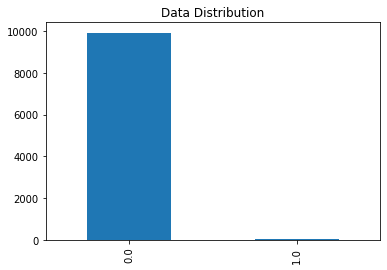

In [ ]:
df.Class.value_counts().plot(kind='bar', title = 'Data Distribution')

From this plot, we can see that we have a very imbalanced dataset, i.e., just about 99 % of the dataset belongs to the Non-Fraud class.

Many machine learning models are designed to maximize overall accuracy or minimize overall error rate, while in the case of Imbalalanced learning, things are not the same. Suppose if in this example, even if we classify every entry to the non-fraud class, we will get an accuracy of 99 %, but this is not what we want

### Undersampling Majority Samples

Undersampling can be the right choice when we have a ton of data - think million of rows. But we have a drawback, i.e., removal of information which may be valuable.

We will use the resampling module from Scikit Learn to randomly remove samples from the majority class, i.e., class 0.



In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

In [ ]:
X = pd.concat([X, y], axis=1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [ ]:
# upsample minority
not_fraud_downsampled = resample(not_fraud,
                          replace=True, # sample with replacement
                          n_samples=len(fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
downsampled = pd.concat([fraud, not_fraud_downsampled])

# check new class counts
downsampled.Class.value_counts()

0.0    38
1.0    38
Name: Class, dtype: int64

Here, we have reduced the number of samples from the majority class(Class 0, Non-Fraud) to the number same as that of minority class (Class 1, Fraud) and use this downsampled data to train the model.

__Merits of undersampling__

- It improves the run time and storage problems since the number of samples are reduced.

__Demerits of undersampling__

- It discards the potentially useful information which could be important for building rule classifiers.

- Randomly selecting the samples to undersample may be the biased one which can result in inaccurate results with the actual test data set.

You will see the use of undersampling technique in a ML model and how it actually alters the performance with different evaluation metrics in **Chapter 6:Imbalance-Learn**.

## UnderSampling Vs OverSampling

From an example demonstrated above, we are now familiar with Undersampling.

As stated earlier in the *Introduction* chapter, Undersampling and oversampling are some of the significant approaches to random resampling for imbalanced classification. Random Undersampling randomly delete examples in the majority class while Random Oversampling randomly duplicates example in the minority class. Random oversampling involves randomly selecting samples from the minority class, with replacement, and adding them to the training dataset while on the other hand, Undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset.

Here, both resampling techniques can be repeated until the desired class distribution is achieved in the training dataset, such as equal split across the classes.

Both these techniques fall under 'Naive Resampling' since they assume nothing about the data, and no heuristics are used. That's why they are fast and straightforward to execute, which is suitable for huge and complex datasets.


While random Undersampling suffered from the loss of potentially useful information, random oversampling suffers from the problem of overfitting.

We can get interesting results by combining both oversampling and Undersampling. Common examples include SMOTE or SMOTE with ENN. We will learn these hybrid algorithms in the upcoming chapters.




## Key Takeaways
Here, in this chapter, we visited one of the approaches to resolve the problems created due to the Imbalanced Dataset. Random Undersampling falls under Resampling techniques, which deals with the concept of randomly removing samples from the majority class, with or without replacement. This is one of the earliest methods used to alleviate the imbalance in the dataset; it may decrease the variance of the classifier and may potentially remove the useful samples and information embedded within them.

Then after, we compared Undersampling and Oversampling in terms of how they remove the imbalance within the majority and minority classes. Contrary to Undersampling, Random Oversampling involves supplementing the training data with multiple copies of the minority classes.